In [45]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from warnings import filterwarnings 

In [46]:
# Initializing clean csv file

cleanpath = Path('../csv/clean_data.csv')
file = pd.read_csv(cleanpath)
file.head()


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [47]:
# Narrow down data set to relevant columns

sex_df = file[['ID','SEX','PREVALENT CHD','PERIOD']]
sex_df

chd = sex_df.loc[sex_df['PREVALENT CHD']=='YES',:]
chd
# 517 rows of CHD participants across all Periods, from clean data

chd_p1 = chd.loc[chd['PERIOD']==1,:]
chd_p1
# 64 in Period 1

chd_p3 = chd.loc[chd['PERIOD']==3,:]
chd_p3
# 300 in Period 3 (remainder in Period 2)


,ID,SEX,PREVALENT CHD,PERIOD
56,68397,M,YES,3
101,134914,F,YES,3
155,199546,F,YES,3
179,208566,M,YES,3
194,228129,F,YES,3
...,...,...,...,...
8192,9906195,F,YES,3
8225,9939850,F,YES,3
8234,9951694,M,YES,3
8240,9964282,M,YES,3


In [66]:
#  Sex and  CHD

#filter by Period == 1

sex_p1 = pd.DataFrame()
sex_p1 = sex_df.loc[sex_df['PERIOD']==1,:]
sex_p1

sex_p1 = sex_p1[['ID','SEX','PREVALENT CHD']]

# Debugging, to make sure data is being filtered correctly.

# Females in Period 1
female_p1 = sex_p1.loc[sex_p1['SEX']=='F',:]
female_p1

# Males in Period 1
male_p1 = sex_p1.loc[sex_p1['SEX']=='M',:]
male_p1

#Filter data by PREVALENT CHD =='YES'

male_p1_chd= male_p1.loc[male_p1['PREVALENT CHD']=='YES',:]
male_p1_chd.count()

female_p1_chd = female_p1.loc[female_p1['PREVALENT CHD']=='YES',:]
female_p1_chd 

### >>>> FINDINGS/OBSERVATIONS <<<<
#   2754 total rows count (P1)
#   1546 rows of FEMALES
#       25 w/ CHD
#   1208 rows of MALES (F>M)
#       39 with CHD (Fchd < F0)

#     so Mchd > Fchd, despite there being more females in the pool

,ID,SEX,PREVALENT CHD
420,556045,F,YES
426,571377,F,YES
717,870652,F,YES
1716,2080190,F,YES
1761,2134396,F,YES
1983,2408348,F,YES
2160,2646666,F,YES
2190,2682411,F,YES
2304,2839250,F,YES
2541,3117784,F,YES


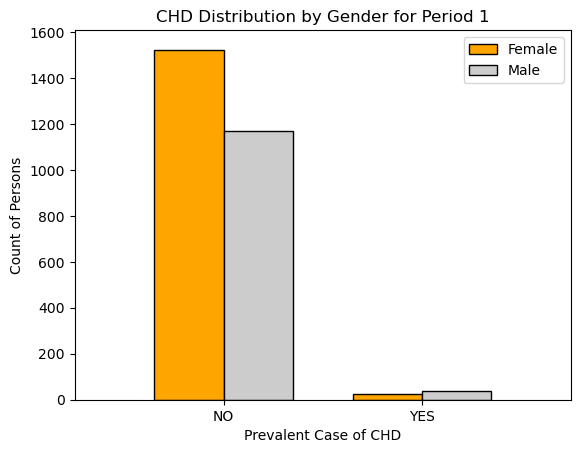

In [49]:
# PERIOD 1 PLOTTING: SEX AND CHD PREVALENCE

yesorno = ['NO','YES']
sexes = np.arange(len(yesorno))

female_axis=female_p1.groupby(['PREVALENT CHD'])['ID'].count()
female_axis

male_axis= male_p1.groupby(['PREVALENT CHD'])['ID'].count()
male_axis
    
# Double plotting for both sexes individually

bars_widthz = 0.35

plt.bar(sexes - bars_widthz/2,female_axis,label='Female',color='orange',align='center',edgecolor='black',width=0.35)
plt.bar(sexes + bars_widthz/2,male_axis,label='Male',color='0.80',align='center',edgecolor='black',width=0.35)

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Gender for Period 1')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

In [50]:
# Now repeat steps from before but for data when PERIOD == 3 for comparison

# Collect descriptive stats

sex_p3 = pd.DataFrame()
sex_p3 = sex_df.loc[sex_df['PERIOD']==3,:]
sex_p3

sex_p3 = sex_p3[['ID','SEX','PREVALENT CHD']]
sex_p3

female_p3 = sex_p3.loc[sex_p3['SEX']=='F',:]
female_p3

male_p3 = sex_p3.loc[sex_p3['SEX']=='M',:]
male_p3

#Split by PREVALENT CHD == 'YES'

male_p3_chd= male_p3.loc[male_p3['PREVALENT CHD']=='YES',:]
male_p3_chd.count()

female_p3_chd = female_p3.loc[female_p3['PREVALENT CHD']=='YES',:]
female_p3_chd

##FINDINGS FOR PERIOD 3
#   2754 rows count (matches P1)
#   1546 count of FEMALES
#       127 W/CHD
#   1208 rows of MALES
#       173 W/ CHD

#   Pattern continues with Mchd > Fchd


,ID,SEX,PREVALENT CHD
101,134914,F,YES
155,199546,F,YES
194,228129,F,YES
254,344720,F,YES
263,359422,F,YES
...,...,...,...
8024,9689494,F,YES
8060,9746116,F,YES
8165,9868819,F,YES
8192,9906195,F,YES


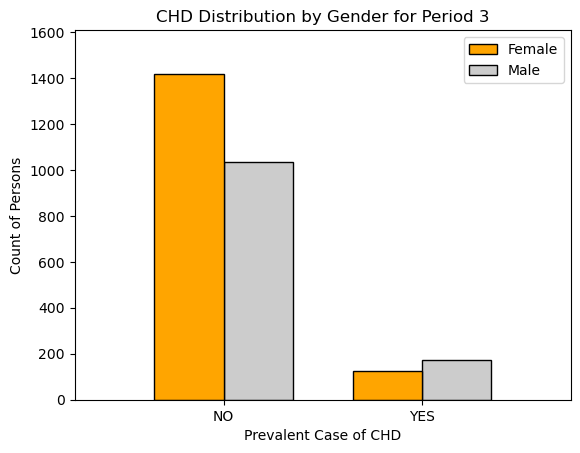

In [51]:
# PERIOD 3 PLOTTING: SEX AND CHD PREVALENCE

sexes = np.arange(len(yesorno))
yesorno = ['NO','YES']

female_axis2=female_p3.groupby(['PREVALENT CHD'])['ID'].count()
female_axis2

male_axis2= male_p3.groupby(['PREVALENT CHD'])['ID'].count()
male_axis2
                
# Double plotting for both sexes individually

bars_width = 0.35

plt.bar(sexes - bars_width/2,female_axis2,label='Female',color='orange',align='center',edgecolor='black',zorder=2, width=0.35)
plt.bar(sexes + bars_width/2,male_axis2,label='Male',color='0.80',align='center',edgecolor='black', width = 0.35)

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Gender for Period 3')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

In [52]:
# SEX, SMOKING AND CHD 

# Creating a new dataframe with relevant columns
smoking_df = file[['ID','SEX','SMOKING STATUS','PREVALENT CHD','PERIOD']]
smoking_df.head()

# Split data by Period 1 and Period 3 
smoking_p1 = pd.DataFrame()
smoking_p1 = smoking_df.loc[smoking_df['PERIOD']==1,:]
smoking_p1

# Further filter by to only show rows where SMOKING STATUS == 'YES'
smoking_p1 = smoking_p1.loc[smoking_p1['SMOKING STATUS']=='YES',:]
smoking_p1


#   Checkpoint!
#   1299 = Total rows of smokers (F+M)

,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
9,16365,M,YES,NO,1
15,24721,F,YES,NO,1
18,33077,M,YES,NO,1
21,34689,F,YES,NO,1
27,40435,F,YES,NO,1
...,...,...,...,...,...
8223,9939850,F,YES,NO,1
8235,9961615,M,YES,NO,1
8247,9973350,F,YES,NO,1
8250,9978986,F,YES,NO,1


In [53]:
# Debugging, to make sure data is being filtered correctly.


female_smp1 = smoking_p1.loc[smoking_p1['SEX']=='F',:]
female_smp1

male_smp1 = smoking_p1.loc[smoking_p1['SEX']=='M',:]
male_smp1

# #Once again split data further, by PREVALENT CHD (yes or no)

male_smp1_chd= male_smp1.loc[male_smp1['PREVALENT CHD']=='YES',:]
male_smp1_chd

female_smp1_chd = female_smp1.loc[female_smp1['PREVALENT CHD']=='YES',:]
female_smp1_chd

# >FINDINGS/ANALYSIS<
#   604 rows of Female smokers
#       4 female smokers w/ CHD
#   695 rows of Male smokers
#       20 male smokers w/ CHD
#
#    More Males smokers and more males with CHD.

,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
1983,2408348,F,YES,YES,1
3231,3915943,F,YES,YES,1
4575,5610759,F,YES,YES,1
8058,9746116,F,YES,YES,1


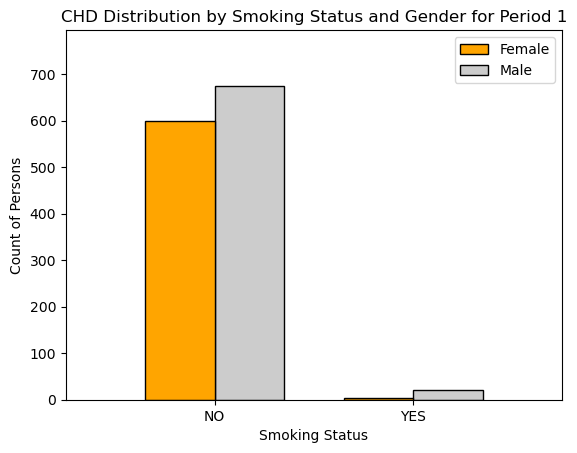

In [62]:
# PERIOD 1 PLOTTING: SMOKING, SEX AND CHD PREVALENCE

female_axis3=female_smp1.groupby(['PREVALENT CHD'])['ID'].count()
female_axis3

male_axis3= male_smp1.groupby(['PREVALENT CHD'])['ID'].count()
male_axis3

sexes = np.arange(len(yesorno))
bars_widthz

# Double plotting for both sexes individually
plt.bar(sexes - bars_widthz/2,female_axis3,label='Female',color='orange',align='center',zorder=2,edgecolor='black', width = 0.35)
plt.bar(sexes + bars_widthz/2,male_axis3,label='Male',color='0.80',align='center',edgecolor='black', width = 0.35)

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Smoking Status and Gender for Period 1')
plt.xlabel("Smoking Status")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_smp1['PREVALENT CHD']=='YES').count()+100)
plt.legend()
plt.show()
#fix categories (both are chd and smoking)

In [55]:
# SEX, SMOKING AND CHD FOR PERIOD 3

smoking_p3 = pd.DataFrame()
smoking_p3 = smoking_df.loc[smoking_df['PERIOD']==3,:]
smoking_p3

# Filter by SMOKING STATUS == 'YES'

smoking_p3 = smoking_p3.loc[smoking_df['SMOKING STATUS']=='YES',:]
smoking_p3

#   Checkpoint!
#   934 total rows of smokers in P3
#      > Number of smokers dropped by nearly 400 from P1.

,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
17,24721,F,YES,NO,3
20,33077,M,YES,NO,3
23,34689,F,YES,NO,3
29,40435,F,YES,NO,3
35,45464,F,YES,NO,3
...,...,...,...,...,...
8207,9920050,F,YES,NO,3
8210,9925133,F,YES,NO,3
8222,9938128,M,YES,NO,3
8237,9961615,M,YES,NO,3


In [56]:
# Debugging, to make sure data is being filtered correctly.


female_smp3 = smoking_p3.loc[smoking_p3['SEX']=='F',:]
female_smp3

male_smp3 = smoking_p3.loc[smoking_p3['SEX']=='M',:]
male_smp3

# #Once again split data further, by PREVALENT CHD (yes or no)

male_smp3_chd= male_smp3.loc[male_smp3['PREVALENT CHD']=='YES',:]
male_smp3_chd

female_smp3_chd = female_smp3.loc[female_smp3['PREVALENT CHD']=='YES',:]
female_smp3_chd.count()

# >FINDINGS/ANALYSIS<
#   469 rows of Female smokers
#       23 female smokers w/ CHD
#           (increased from 4 in P1)
#   465 rows of Male smokers
#       58 male smokers w/ CHD
#           (increased from 20 in P1)
#
#   Interestingly enough, there is also a drop in total smoker count in P3 compared to P1.
#   SAME PATTERN: More Males smokers and more mals with CHD.
# NEW!!.. more smokers got diagnosed with CHD by Period 3!!!!(a CORRELATION of smoking with CHD)

ID                23
SEX               23
SMOKING STATUS    23
PREVALENT CHD     23
PERIOD            23
dtype: int64

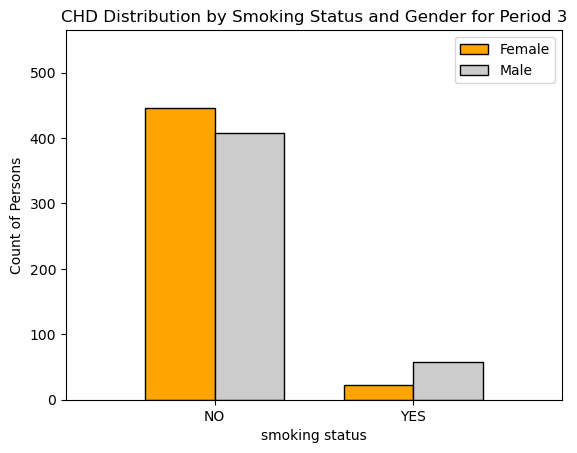

In [64]:
# PERIOD 3 PLOTTING: SMOKING, SEX AND CHD PREVALENCE

female_axis4=female_smp3.groupby(['PREVALENT CHD'])['ID'].count()
female_axis4

male_axis4= male_smp3.groupby(['PREVALENT CHD'])['ID'].count()
male_axis4

sexes = np.arange(len(yesorno))

# Double plotting for both sexes individually
plt.bar(sexes - bars_widthz/2,female_axis4,label='Female',color='orange',align='center',width = 0.35, edgecolor = 'black')
plt.bar(sexes + bars_widthz/2 ,male_axis4,label='Male',color='0.80',align='center', width=0.35, edgecolor = 'black')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Smoking Status and Gender for Period 3')
plt.xlabel('smoking status')
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_smp3['PREVALENT CHD']=='YES').count()+100)
plt.legend()
plt.show()

In [ ]:
# Findings

# Period 1 results show that a persons smoking does not appear to be correlated to their CHD prevalence, however,
# it is important to note that the total smoker count being over 600 per sex, the ones who did have CHD were a significantly 
# smaller number.
# Comparing Period 1 results to Period 3, there was a drop in smoker counts, but surprisingly an increase in their CHD diagnosis. 
# This could imply that there may have been a correlation among smoking status and CHD. 
# Finally, dispersing data by Sex and Smoking, men took the lead in CHD cases for both categories, individually and combined.


 
#